# Assignment 2 - Auto ML

##Abstract
The dataset for this assignment that we are going to explore with AutoML techniques is that of Crypt Currencies. Cryptocurrencies have emerged as a novel asset class, captivating both investors and researchers due to their decentralized nature and potential for high volatility. In this study, we present a comprehensive dataset comprising historical cryptocurrency market data sourced from various exchanges. This dataset encompasses a wide range of features including price, volume, market capitalization, close ratio etc.

The primary objective of this is to utilize automated machine learning (AutoML) techniques provided by H2O.ai to explore and analyze patterns within the cryptocurrency market data. AutoML offers a systematic approach to model selection, hyperparameter tuning, and feature engineering, thereby enabling efficient and effective analysis of complex datasets.

For this assignment we will also take isnigts that we have gathered from the EDA that we did on the dataset fro the previous assignment.


##Adding H2O.ai

Here we will try to install H2o.ai and try to get a understanding of how the data that we have will respond to the different models that will be trained on.

In [2]:
!pip3 install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=f84a20e12a980783e5847ea43b0f91206faf32877c384fb96e8f2e7fa2c68175
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


As we can see, we have sucessfully install h2o for auto ml analysis of our dataset so that we can accurately predict the `close` price for the next day. We can now initliaze H2o and feed it the dataset to parse with a few parameters that we want to be incorporated into when we run the h2o autoML models on our dataset.

In [3]:
import h2o
import matplotlib as plt
h2o.init(strict_version_check=False)



Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkckuz_pa
  JVM stdout: /tmp/tmpkckuz_pa/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpkckuz_pa/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_6vnfbz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


As we can see here after initializing the h2o model, the model is being hsoted on alocalhost server of the google colab machien and is now ready to pase the dataset we have and generate insights based on its models.

In [4]:
cryptoDF = h2o.import_file("https://media.githubusercontent.com/media/sampurng/INFO6105/main/crypto-markets.csv")
cryptoDF.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:942297
Cols:13

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
type,enum,enum,enum,time,int,real,real,real,real,int,int,real,real
mins,,,,1367107200000.0,1.0,2.5e-09,3.2e-09,2.5e-10,2e-10,0.0,0.0,-1.0,0.0
mean,,,,1502340175641.4324,1000.1706075685245,348.3521989396373,408.5929736812935,296.25263956508434,346.1017511531891,8720383.287837218,172505976.16536877,0.45949948201044843,112.33997064619767
maxs,,,,1543536000000.0,2072.0,2298390.0,2926100.0,2030590.0,2300740.0,23840899072.0,326502485530.0,1.0,1770563.0
sigma,,,,38694507461.9415,587.5752832231876,13184.357961707452,16163.859195662675,10929.31322764039,13098.223089999823,183980157.98354992,3575589517.5035205,0.3261604969732197,6783.712914890926
zeros,,,,0,0,0,0,0,0,27820,117697,51481,502888
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,bitcoin,BTC,Bitcoin,2013-04-28 00:00:00,1.0,135.3,135.98,132.1,134.21,0.0,1488566728.0,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29 00:00:00,1.0,134.44,147.49,134.0,144.54,0.0,1603768865.0,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30 00:00:00,1.0,144.0,146.93,134.05,139.0,0.0,1542813125.0,0.3843,12.88


As we can see here, the dataset is hosted on a github repository. Since the dataset sie was greater than 50Mb github did not allow a standard uplaod for this repository. Instead we have used gt lfs to store the dataset int eh repository. To  use a large file system to store larger files on github, the steps can be read [here](https://git-lfs.com/).

Now that we have parsed the dataset using h2o and seen a description of the data we can now split our data and run our h2o models to get the result for which model fits best. For the purposes of this assignment we are going to use the following estimators to predict our `close` price for any given day and any given crypto currency. The models being used are as follows:<br/>
- **Gradient Boosting Estimator**
- **Random Forest Estimator**
- **Decision Tree Estimator**
- **XGBoost Estimator**

In [35]:
cryptoDF = cryptoDF[cryptoDF["symbol"] == "BTC"]
cryptoTrain, cryptoTest = cryptoDF.split_frame(ratios=[0.8])

In [6]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=25, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=["open", "high", "low", "volume", "market", "close_ratio", "spread"], y="close", training_frame=cryptoTrain)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_1_20240219_205940


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    81                 81                          63281                  6            6            6             25            64            57.5556

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 40.668461654884794
RMSE: 6.377182893322473
MAE: 3.981773109013744
RMSLE: 0.007797502084898553
Mean Residual Deviance: 40.668461654884794

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 5636.489581805363
RMSE: 75.07655813771275
MAE: 23.59889038326126
RMSLE: 0.017069022252544037
Mean Residual Deviance: 5636.489581805363

Cross-Validation Metrics Summary: 
                        mean      sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     23.3785   3.45582      20.3237       22.412        28.8189       24.5265       20.8115
mean_residual_deviance  5641.13   2765.36      4595.73       4613.34       9753.52       6795.08       2447.96
mse                     5641.13   2765.36      4595.73       4613.34       9753.52       6795.08       2447.96
r2                      0.999545  0.000218243  0.999626      0.99963       0.999224      0.999446      0.999799
residual_deviance       5641.13   2765.36      4595.73       4613.34       9753.52       6795.08       2447.96
rmse                    73.2765   18.4283      67.7918       67.9216       98.7599       82.4323       49.4769
rmsle                   0.015915  0.000951309  0.0155687     0.0152596     0.0175244     0.0159955     0.0152266

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-02-19 21:00:45  3.053 sec   0                  3513.63          2672.23         1.23456e+07
    2024-02-19 21:00:45  3.085 sec   5                  2074.96          1577.73         4.30544e+06
    2024-02-19 21:00:45  3.116 sec   10                 1225.49          931.666         1.50183e+06
    2024-02-19 21:00:45  3.146 sec   15                 724.401          550.117         524757
    2024-02-19 21:00:45  3.176 sec   20                 428.096          324.873         183266
    2024-02-19 21:00:45  3.224 sec   25                 253.294          191.875         64157.8
    2024-02-19 21:00:45  3.255 sec   30                 150.17           113.277         22551
    2024-02-19 21:00:45  3.285 sec   35                 89.4259          66.9049         7996.99
    2024-02-19 21:00:45  3.316 sec   40                 53.8369          39.6793         2898.41
    2024-02-19 21:00:45  3.342 sec   45                 32.9944          23.7587         1088.63
    2024-02-19 21:00:45  3.381 sec   50                 21.1079          14.701          445.543
    2024-02-19 21:00:45  3.411 sec   55                 14.4866          9.7461          209.862
    2024-02-19 21:00:46  3.474 sec   60                 10.8352          7.09507         117.402
    2024-02-19 21:00:46  3.509 sec   65                 8.9118           5.63288         79.4201
    2024-02-19 21:00:46  3.550 sec   70                 7.83219          4.82951         61.3432
    2024-02-19 21:00:46  3.579 sec   75                 7.05917          4.32327         49.8319
    2024-02-19 21:00:46  3.607 sec   80                 6.45673          4.02166         41.6893
    2024-02-19 21:00:46  3.613 sec   81     

In [98]:
results = aml.leaderboard
results

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
GBM_5_AutoML_1_20240219_205940,23.5989,75.0766,5636.49,0.017069,5636.49
StackedEnsemble_AllModels_1_AutoML_1_20240219_205940,25.4563,80.4366,6470.04,0.0299208,6470.04
GBM_4_AutoML_1_20240219_205940,27.7537,114.67,13149.1,0.0187396,13149.1
StackedEnsemble_BestOfFamily_1_AutoML_1_20240219_205940,28.2304,80.8413,6535.31,0.0398677,6535.31
GBM_2_AutoML_1_20240219_205940,31.0396,111.937,12529.9,0.0202,12529.9
GBM_3_AutoML_1_20240219_205940,32.0226,118.082,13943.3,0.0211619,13943.3
GBM_grid_1_AutoML_1_20240219_205940_model_1,34.2446,118.107,13949.2,0.0225239,13949.2
XGBoost_grid_1_AutoML_1_20240219_205940_model_4,38.6638,116.068,13471.8,0.0229234,13471.8
XGBoost_grid_1_AutoML_1_20240219_205940_model_1,39.5009,118.233,13979,0.0234329,13979
XGBoost_3_AutoML_1_20240219_205940,39.5981,119.259,14222.6,0.0297712,14222.6


As we can see int he above results obtained with the H2o.ai Auto ML models, we have the respective models that have been used by the AutoML library and the residuals of each of those models, specifically, we get to see how each model performs on the basis of the following:
##- MAE (Mean Average Error)
The mean average error refors to the average of all the errors that we encounter from our predicted values. It can be obtained with the following formula. <br/>
\begin{align}
MAE &= \sum_{i=1}^{D}|x_i-y_i|
\end{align}

##- MSE (Mean Squared Error)
The mean squared error is the sqaured of the mean error that we calcualte. The difference here is that with this method, we can penalize outliers heavily and not have those outliers affect the efficacy of the model. To calcumate the MSE,we can use the following formula.
\begin{align}
 MSE &= \sum_{i=1}^{D}(x_i-y_i)^2
\end{align}

##- RMSE (Root mean Sqaured Error)
RMSE commonly reffered to as the root mean squared error provides a measure of the average magnitude of the errors in the predicted values. It is the root of the MSE but is more interpretable and gives us an idea of the standard deviation of the errors as well. It can be represented with the following formula.
\begin{align}
 MSE &= \sqrt{\sum_{i=1}^{D}(x_i-y_i)^2} = \sqrt{MSE}
\end{align}


##- RMSLE (Root mean Squared Logarithmic Error)
The logarithmic error is less sensitive towards outliers and does not penalize the model as much. It is highly interpretable as we take logs of values here and is highly effective in handling skewed data. We can garner from the EDA that most distributions were fat tailed and hence we can conclude that teh `RMSLE` will be the most effective parameter in determining the efficacy of models for this set. It can be calcualted using the given formula.
\begin{align}
RMSLE &= \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \log(y_i + 1) - \log(\hat{y}_i + 1) \right)^2}
\end{align}
Where:
- n  is the number of samples.
- $y_i$ is the true target value for the $( i )-th$ sample.
- $\hat{y}_i$  is the predicted target value for the $( i )-th$ sample.

##- Mean Residual Deviance
The mean residual deviance is a measure of model fit commonly used in the context of generalized linear models (GLMs), particularly in logistic regression. It measures the average discrepancy between observed and predicted values, with lower values indicating better model fit. It measures the overall fit of the model and allows for better comaprison and aids in interpretability. it can be calcualted with the given formula.
\begin{align}
  MRD &= \frac{1}{n} \sum_{i=1}^{n} d_i^2
\end{align}
Where:
-  n is the number of observations.
-  $d_i$ is the residual for the $( i )-th$ observation, calculated as <br/>
\begin{align}
d_i = y_i - \hat{y}_i
\end{align}
-  $y_i$ is the observed response and $\hat{y}_i$ is the predicted response.


<br/>
<br/>
<br/>
<br/>





With these error params we can accurately decide whihc model supports our dataset best and whihc one we can chose moving forward in order get the most suitable model for predicting the `close` price.

#Model 1 - Gradient Boost Machine (ID : GBM_5_AutoML_1_20240219_205940)
In GBM, decision trees are built sequentially, with each tree attempting to correct the errors made by the previous trees. This model was chosen on the given error parameters above by the autoML library. We can now test the following model for its efficacy on our testing dataset. To do that first we need to get our model fromm the `aml` variable.

In [9]:
GBM_best_model = aml.get_best_model()
#let's look at how what are the details of the model.
GBM_best_model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_1_20240219_205940


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    81                 81                          63281                  6            6            6             25            64            57.5556

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 40.668461654884794
RMSE: 6.377182893322473
MAE: 3.981773109013744
RMSLE: 0.007797502084898553
Mean Residual Deviance: 40.668461654884794

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 5636.489581805363
RMSE: 75.07655813771275
MAE: 23.59889038326126
RMSLE: 0.017069022252544037
Mean Residual Deviance: 5636.489581805363

Cross-Validation Metrics Summary: 
                        mean      sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     23.3785   3.45582      20.3237       22.412        28.8189       24.5265       20.8115
mean_residual_deviance  5641.13   2765.36      4595.73       4613.34       9753.52       6795.08       2447.96
mse                     5641.13   2765.36      4595.73       4613.34       9753.52       6795.08       2447.96
r2                      0.999545  0.000218243  0.999626      0.99963       0.999224      0.999446      0.999799
residual_deviance       5641.13   2765.36      4595.73       4613.34       9753.52       6795.08       2447.96
rmse                    73.2765   18.4283      67.7918       67.9216       98.7599       82.4323       49.4769
rmsle                   0.015915  0.000951309  0.0155687     0.0152596     0.0175244     0.0159955     0.0152266

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-02-19 21:00:45  3.053 sec   0                  3513.63          2672.23         1.23456e+07
    2024-02-19 21:00:45  3.085 sec   5                  2074.96          1577.73         4.30544e+06
    2024-02-19 21:00:45  3.116 sec   10                 1225.49          931.666         1.50183e+06
    2024-02-19 21:00:45  3.146 sec   15                 724.401          550.117         524757
    2024-02-19 21:00:45  3.176 sec   20                 428.096          324.873         183266
    2024-02-19 21:00:45  3.224 sec   25                 253.294          191.875         64157.8
    2024-02-19 21:00:45  3.255 sec   30                 150.17           113.277         22551
    2024-02-19 21:00:45  3.285 sec   35                 89.4259          66.9049         7996.99
    2024-02-19 21:00:45  3.316 sec   40                 53.8369          39.6793         2898.41
    2024-02-19 21:00:45  3.342 sec   45                 32.9944          23.7587         1088.63
    2024-02-19 21:00:45  3.381 sec   50                 21.1079          14.701          445.543
    2024-02-19 21:00:45  3.411 sec   55                 14.4866          9.7461          209.862
    2024-02-19 21:00:46  3.474 sec   60                 10.8352          7.09507         117.402
    2024-02-19 21:00:46  3.509 sec   65                 8.9118           5.63288         79.4201
    2024-02-19 21:00:46  3.550 sec   70                 7.83219          4.82951         61.3432
    2024-02-19 21:00:46  3.579 sec   75                 7.05917          4.32327         49.8319
    2024-02-19 21:00:46  3.607 sec   80                 6.45673          4.02166         41.6893
    2024-02-19 21:00:46  3.613 sec   81     

Here we can observe from the results that the model has already perfromed cross validation and the number of trees that it takes to make a decision for the `close` value is 81. There are other GBM models as well but they have a lower efficacy than this model. This is because of something known as hyper parameter tuning. If we check all `GBM` based models and their hyper params, they will all be different, Here for the best GBM model on our dataset we can see that the hyperparamters are as follows.

In [15]:
GBM_best_model.feature_interaction


<bound method ModelBase.feature_interaction of H2OGradientBoostingEstimator({'parms': {'model_id': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'model_id', 'label': 'model_id', 'help': 'Destination id for this model; auto-generated if not specified.', 'required': False, 'type': 'Key<Model>', 'default_value': None, 'actual_value': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_5_AutoML_1_20240219_205940', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_5_AutoML_1_20240219_205940'}, 'input_value': None, 'level': 'critical', 'values': [], 'is_member_of_frames': [], 'is_mutually_exclusive_with': [], 'gridable': False}, 'training_frame': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'training_frame', 'label': 'training_frame', 'help': 'Id of the training data frame.', 'required': False, 'type': 'Key<Frame>', 'default_value': None, 'actual_value': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240219_205940_training_py_3_sid_94df', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240219_205940_training_py_3_sid_94df'}, 'input_value': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240219_205940_training_py_3_sid_94df', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240219_205940_training_py_3_sid_94df'}, 'level': 'critical', 'values': [], 'is_member_of_frames': [], 'is_mutually_exclusive_with': [], 'gridable': False}, 'validation_frame': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'validation_frame', 'label': 'validation_frame', 'help': 'Id of the validation data frame.', 'required': False, 'type': 'Key<Frame>', 'default_value': None, 'actual_value': None, 'input_value': None, 'level': 'critical', 'values': [], 'is_member_of_frames': [], 'is_mutually_exclusive_with': [], 'gridable': True}, 'nfolds': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'nfolds', 'label': 'nfolds', 'help': 'Number of folds for K-fold cross-validation (0 to disable or >= 2).', 'required': False, 'type': 'int', 'default_value': 0, 'actual_value': 5, 'input_value': 5, 'level': 'critical', 'values': [], 'is_member_of_frames': [], 'is_mutually_exclusive_with': [], 'gridable': False}, 'keep_cross_validation_models': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'keep_cross_validation_models', 'label': 'keep_cross_validation_models', 'help': 'Whether to keep the cross-validation models.', 'required': False, 'type': 'boolean', 'default_value': True, 'actual_value': False, 'input_value': False, 'level': 'expert', 'values': [], 'is_member_of_frames': [], 'is_mutually_exclusive_with': [], 'gridable': False}, 'keep_cross_validation_predictions': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'keep_cross_validation_predictions', 'label': 'keep_cross_validation_predictions', 'help': 'Whether to keep the predictions of the cross-validation models.', 'required': False, 'type': 'boolean', 'default_value': False, 'actual_value': True, 'input_value': True, 'level': 'expert', 'values': [], 'is_member_of_frames': [], 'is_mutually_exclusive_with': [], 'gridable': False}, 'keep_cross_validation_fold_assignment': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'keep_cross_validation_fold_assignment', 'label': 'keep_cross_validation_fold_assignment', 'help': 'Whether to keep the cross-validation fold assignment.', 'required': False, 'type': 'boolean', 'default_value': False, 'actual_value': False, 'input_value': False, 'level': 'expert', 'values': [], 'is_member_of_frames': [], 'is_mut

In the metrics section we can observe which features are important and how they interact with the model. <br/><br/>
In order to check the efficacy of our best model, we can run it on the testing dataset adn see how well it performs compared to the actual values.

In [10]:
GBM_best_model.model_performance(cryptoTest)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1903.2123518333096
RMSE: 43.62582207630373
MAE: 17.798465763428563
RMSLE: 0.016557147728387504
Mean Residual Deviance: 1903.2123518333096

In order to visualize our results, we can also use the explain function get some graphical insights on how the model performs on test data.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

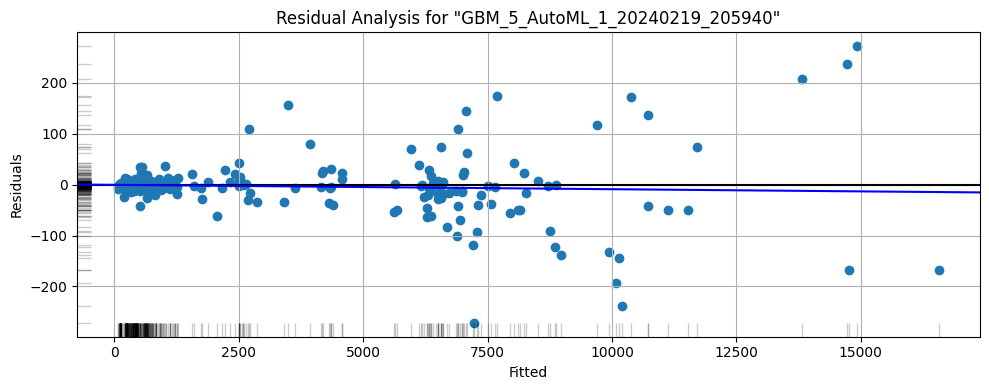

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

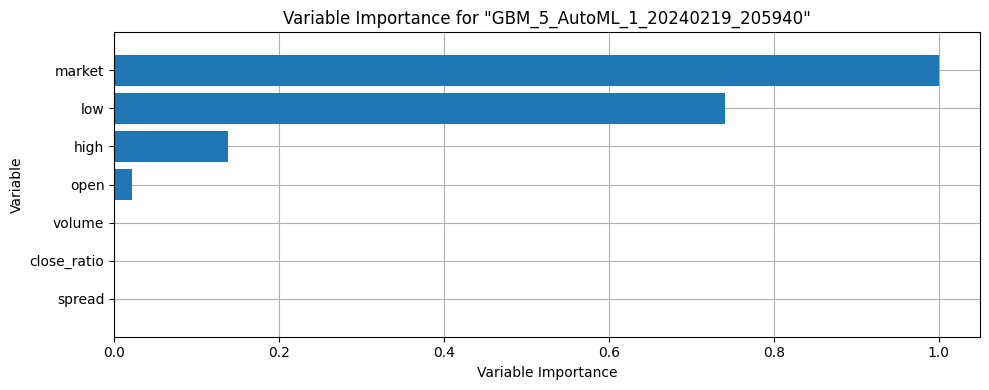

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

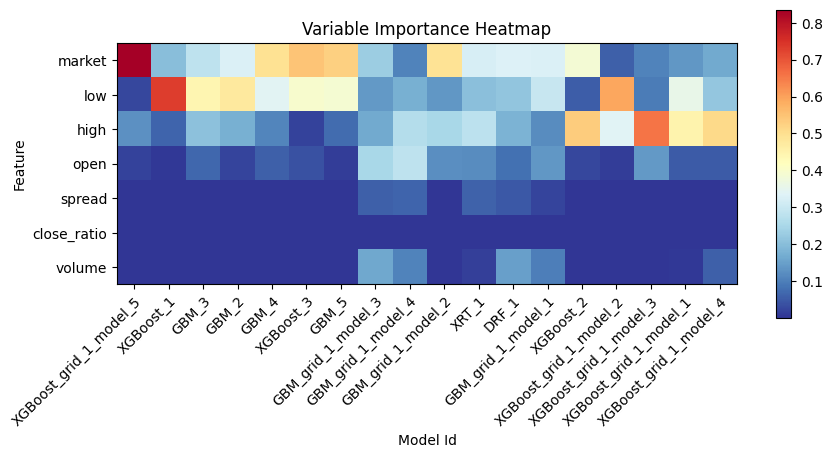

In [18]:
explain_model = aml.explain(frame = cryptoTest, figsize = (10,4), include_explanations=['varimp', "residual_analysis", "varimp_heatmap"])


In [27]:
r_square = GBM_best_model.r2(train = False)
print("R^2  = ", r_square)

R^2  =  0.9999967058273129


##Is the relationship significant?

While the score we have gotten is high, it also indicates the possibility of overfitting for our given best model.  With the feature importance, R^2 score and the residual analysis we can confidently say that the relationship between the predictor and the target variable is significant but there might be a concern of overfitting in the given model.

## Are any model assumptions violated?

The assumtions for a GBM model are as follows:
- Independence of Observations
    * Here data has been taken from the crypto stock excahnge hence there is no concern for any dependence between observations except the `close ratio` as it is a derived column.
- Homoscedasticity
    * As we can observe from the residual analysis, it is evident that Homoscedasticity exists in our residual errors and can be corelated to the inital data itself.
- No Multicollinearity
    * GBM models assume that there is no multicolinearity, we can observe as per our correlation matrix of data, there is some defree of multicolinearity and it is being violated.

## Is there any multicollinearity in the model?

To answer this we can plot a correlation matrix and a heatmap for that correlation matrix on our original data to check.

In [34]:
cryptoDF.cor()

slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,nan,nan,1,nan,0.702952,0.697934,0.710773,0.702928,0.603143,0.710886,0.0399039,0.427115
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,nan,nan,0.702952,nan,1,0.998919,0.998077,0.997652,0.94313,0.997528,-0.00583704,0.788684
nan,nan,nan,0.697934,nan,0.998919,1,0.997896,0.999134,0.946875,0.998728,0.00378081,0.801177
nan,nan,nan,0.710773,nan,0.998077,0.997896,1,0.998717,0.932311,0.99888,0.00382086,0.760691
nan,nan,nan,0.702928,nan,0.997652,0.999134,0.998717,1,0.941103,0.999781,0.0172649,0.784931
nan,nan,nan,0.603143,nan,0.94313,0.946875,0.932311,0.941103,1,0.940248,0.00386957,0.874642


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# the independent variables set
X = cryptoDF[["open", "high", "low", "volume", "market", "close_ratio", "spread", "close"]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)



       feature           VIF
0         open  1.483327e+03
1         high           inf
2          low           inf
3       volume  2.005961e+01
4       market  3.684737e+03
5  close_ratio  2.131365e+00
6       spread  5.700759e+13
7        close  7.159200e+03


divide by zero encountered in scalar divide


As we can see from the variance inflation factor, we can see that some varaibles have an `inf` value whihc signifies that there exists a multicolinearity in our model. It can be explained as this is a time series data so colinearity is expected.

## In the multivariate models are predictor variables independent of all the other predictor variables?
In order to cehck for perdictor variable dependence, we can plot a PDP plot. A pariwise depndence plot helps us determine `∣ρ∣` values which can be used to interpret dependence between predictors. here we can use the metric where `∣ρ∣ > 0.7` to determine dependence. To calcuate a PDP we can use a graphical representation to help us determine.




PartialDependencePlot progress: |

``data`` param of ``ModelBase.partial_plot`` is deprecated, please use ``frame`` instead.


████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GBM_5_AutoML_1_20240219_205940 on column 'open'.
open     mean_response    stddev_response    std_error_mean_response
-------  ---------------  -----------------  -------------------------
68.5     2282.71          3477.67            86.3767
1089.94  2370.09          3440.58            85.4555
2111.37  2514.05          3377.45            83.8876
3132.81  2517.02          3376.82            83.8719
4154.25  2519.6           3377.51            83.8889
5175.68  2561.94          3377.47            83.8881
6197.12  2562.69          3379.27            83.9327
7218.56  2565.66          3376.87            83.8731
8239.99  2565.78          3378.04            83.9021
9261.43  2567.68          3378.96            83.9251
10282.9  2585.29          3410.36            84.7048
11304.3  2626.5           3401.41            84.4827
12325.7  2626.61          3401.77            84.4917
13347.2  2626.64          3401.82            84.4928
14368.6  2626.5 

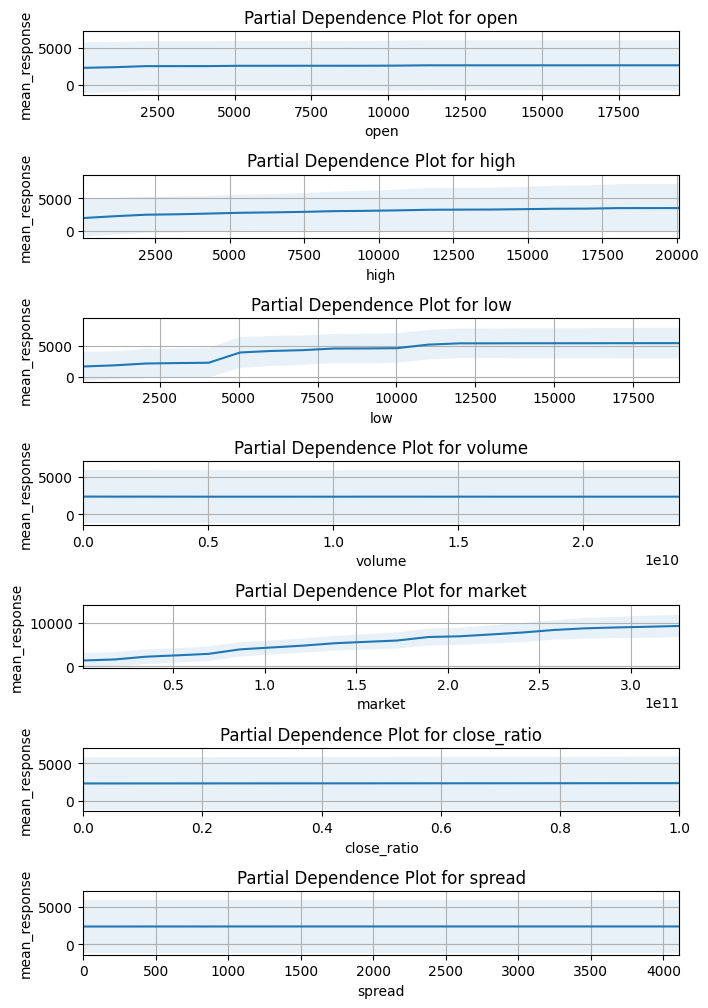

In [54]:
GBM_best_model.partial_plot(data=cryptoTrain, cols=["open", "high", "low", "volume", "market", "close_ratio", "spread"], plot=True)


as showin in PDP there is a dependece in predictor varaibles and the best variables we can use for predicton are `market`, `low` and `high` as they vary as the close value varies.

## In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model

From previous plots `pdp` and `variable importance` we can successfully conclude that these are the predictor varaibles with the most significance ranked.
1. `market`
2. `low`
3. `high`

On excluding the rest from the model, we can observe the following

In [55]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
newSignificantTrain = cryptoTrain[["market", "low", "high", "close"]]

newGBM_best_model = H2OGradientBoostingEstimator(seed = 123)
newGBM_best_model.train(x=["market", "low", "high"], y="close", training_frame=newSignificantTrain)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1708376339751_20


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          19684                  5            5            5             25            28            26.64

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 4124.560975200267
RMSE: 64.22274499895086
MAE: 21.364458572415934
RMSLE: 0.041413195946489866
Mean Residual Deviance: 4124.560975200267

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2024-02-20 00:28:25  0.039 sec   0.0                3512.337289045125   2684.7869665105445  12336513.232016858
     2024-02-20 00:28:25  0.062 sec   1.0                3161.7992483600196  2416.3356371249483  9996974.486929985
     2024-02-20 00:28:25  0.077 sec   2.0                2846.3110692334335  2174.7392819291053  8101486.702840772
     2024-02-20 00:28:25  0.082 sec   3.0                2562.279436315924   1957.265354596561   6565275.909767449
     2024-02-20 00:28:25  0.092 sec   4.0                2306.5474915707523  1761.5803290619517  5320161.330871331
     2024-02-20 00:28:25  0.108 sec   5.0                2076.5690579533516  1585.4291259652666  4312139.05244927
     2024-02-20 00:28:25  0.121 sec   6.0                1869.4331217824852  1426.8909904767083  3494780.196817408
     2024-02-20 00:28:25  0.126 sec   7.0                1682.9913808171054  1284.2391371918195  2832459.9879046674
     2024-02-20 00:28:25  0.136 sec   8.0                1515.3311775060363  1155.825953131175   2296228.5775218303
     2024-02-20 00:28:25  0.141 sec   9.0                1364.4868817706847  1040.2873231110052  1861824.4505242866
---  ---                  ---         ---                ---                 ---                 ---
     2024-02-20 00:28:25  0.378 sec   41.0               77.80095300789044   39.513014109174385  6052.988288935977
     2024-02-20 00:28:25  0.385 sec   42.0               75.00464763609023   36.34526889431557   5625.697167014055
     2024-02-20 00:28:25  0.391 sec   43.0               72.6596303084899    33.511555929966434  5279.421876566423
     2024-02-20 00:28:25  0.402 sec   44.0               70.6954585844065    31.015780750724137  4997.847864459533
     2024-02-20 00:28:25  0.408 sec   45.0               69.0573175116632    28.808243033181437  4768.913101906664
     2024-02-20 00:28:25  0.413 sec   46.0               67.70362037131635   26.89628979484657   4583.780211383321
     2024-02-20 00:28:25  0.420 sec   47.0               66.57685142217798   25.21841384539407   4432.477145290763
     2024-02-20 00:28:25  0.425 sec   48.0               65.64076372409806   23.761307416912363  4308.709862282868
     2024-02-20 00:28:25  0.430 sec   49.0               64.86540755789063   22.489147099207244  4207.521097651256
     2024-02-20 00:28:25  0.436 sec   50.0               64.22274499895086   21.364458572415934  4124.560975200267
[51 rows x 7 columns]


Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
market      7.19364e+10            1                    0.683711
low         2.06322e+10            0.286812             0.196097
high        1.2646e+10             0.175794             0.120193

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

Here we can observe that when running GBM with only the significant predictor varaibles, we have dropeed the following values.
```
- MSE    :  4124.56   
- RMSE   :  64.22
- MAE    :  21.36
- RMSLE  :  0.041
- MRD    :  4124.56
```

Whereas with all variables the errors were the following
```
- MSE    :  5636.48
- RMSE   :  75.0765
- MAE    :  23.598
- RMSLE  :  0.0170
- MRD    :  5636.489
```
We can observe a significant reduction when we use only the significant predictor variables.


##Does the model make sense?

Yes, the model makes the most ssense from all the autoML models that have been provided in teh H2o autoML library. The metrics that we are using to determine sense have been showcased before. ehre's a lsit of parameters used to make this decision.
1. Pairwise decison Plots(PDP)
2. Variable importance
3. Residuals (MSE, MAE, RMSE, RMSLE, MAD)
4. Residual Analysis


##Does regularization help?
In order to determine that, we need to regularize our model. There are several different types of regularization present. Here for GBM Estimator, we can use Ridge regression to check the different ${R^2}$ values and based on that we can see if regualrization helps or not.



In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np

X = cryptoDF[["open", "high", "low", "market", "close_ratio", "volume", "spread"]]
y = cryptoDF[["close"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)
Ridge(alpha=0.5)
# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

rmse


Ill-conditioned matrix (rcond=8.41027e-26): result may not be accurate.


44.32942714202538

As we can observe after regularization the new RMSE is `42.32` whereas before that we were getting a value of `62.22`. We can confidently say taht regularization has helped our model.

##Which independent variables are significant?
AS per the `variable importance`, `parital dependence plots` graph and the `significant predictors` that we have established before, we can say that `market` varaible is the most significant predictor here.

##Which hyperparameters are important?

The hyper parameters that we have gotten from teh GBM modela re as follows

In [58]:
GBM_best_model.actual_params

{'model_id': 'GBM_5_AutoML_1_20240219_205940',
 'training_frame': 'AutoML_1_20240219_205940_training_py_3_sid_94df',
 'validation_frame': None,
 'nfolds': 5,
 'keep_cross_validation_models': False,
 'keep_cross_validation_predictions': True,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'score_tree_interval': 5,
 'fold_assignment': 'Modulo',
 'fold_column': None,
 'response_column': 'close',
 'ignored_columns': ['ranknow', 'symbol', 'date', 'slug', 'name'],
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'ntrees': 81,
 'max_depth': 6,
 'min_rows': 1.0,
 'nbins': 20,
 'nbins_top_level': 1024,
 'nbins_cats': 1024,
 'r2_stopping': 1.7976931348623157e+308,
 'stopping_rounds': 0,
 'stopping_metric': 'deviance',
 'stopping_tolerance': 0.02479931753217214,
 'max_runtime_secs': 0.0,
 'seed': 1244,
 'build

From the list of paramters here for a GBM mdoel the most important features are:
- Tree depth
- Learning Rate
- Number of Trees
- Sample Rate

# Model 2 - Stacked Ensemble (ID : StackedEnsemble_AllModels_1_AutoML_1_20240219_205940)
Teh basic idea behind Ensemble stack is that there are level 0 and level1 models created absed on certain hyper parameters and then they are both combined to predict values with the lease MSE. Ensemble stacking can often improve predictive performance compared to using individual base models alone by leveraging the strengths of different models and reducing the risk of overfitting. It is a powerful technique in machine learning ensemble methods and is commonly used in competitions and real-world applications.




In [61]:
ensembleStack_model = h2o.get_model("StackedEnsemble_AllModels_1_AutoML_1_20240219_205940")
ensembleStack_model

key,value
Stacking strategy,cross_validation
Number of base models (used / total),11/25
# GBM base models (used / total),4/9
# XGBoost base models (used / total),5/8
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),2/5
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [87]:
ensembleStack_model.base_models

['GBM_5_AutoML_1_20240219_205940',
 'GBM_4_AutoML_1_20240219_205940',
 'GBM_2_AutoML_1_20240219_205940',
 'GBM_3_AutoML_1_20240219_205940',
 'GBM_grid_1_AutoML_1_20240219_205940_model_1',
 'XGBoost_grid_1_AutoML_1_20240219_205940_model_4',
 'XGBoost_grid_1_AutoML_1_20240219_205940_model_1',
 'XGBoost_3_AutoML_1_20240219_205940',
 'DRF_1_AutoML_1_20240219_205940',
 'XGBoost_2_AutoML_1_20240219_205940',
 'XGBoost_grid_1_AutoML_1_20240219_205940_model_3',
 'XGBoost_1_AutoML_1_20240219_205940',
 'GBM_grid_1_AutoML_1_20240219_205940_model_4',
 'XGBoost_grid_1_AutoML_1_20240219_205940_model_5',
 'XGBoost_grid_1_AutoML_1_20240219_205940_model_2',
 'XRT_1_AutoML_1_20240219_205940',
 'GBM_grid_1_AutoML_1_20240219_205940_model_2',
 'GBM_grid_1_AutoML_1_20240219_205940_model_3',
 'DeepLearning_1_AutoML_1_20240219_205940',
 'GBM_1_AutoML_1_20240219_205940',
 'DeepLearning_grid_1_AutoML_1_20240219_205940_model_1',
 'DeepLearning_grid_2_AutoML_1_20240219_205940_model_1',
 'DeepLearning_grid_1_AutoML

The combining strategy used here for the level0 and level1 models is `cross validation`. This method of Stacked ensemble gives us the lease MSE for the crypto dataset.

##Is the relationship significant?

To do this we can check for relationship significance importance factor by using the following code.


In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
df = cryptoTrain[['open', 'high', 'low', 'spread', 'market', 'volume', 'close', 'close_ratio']].as_data_frame()
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


divide by zero encountered in scalar divide


,variables,VIF
0,open,1.469567e+03
1,high,inf
2,low,inf
3,spread,2.573486e+14
4,market,3.688689e+03
5,volume,1.951151e+01
6,close,7.039870e+03
7,close_ratio,2.111643e+00


PartialDependencePlot progress: |

``data`` param of ``ModelBase.partial_plot`` is deprecated, please use ``frame`` instead.


████████████████████████████████████████████████| (done) 100%


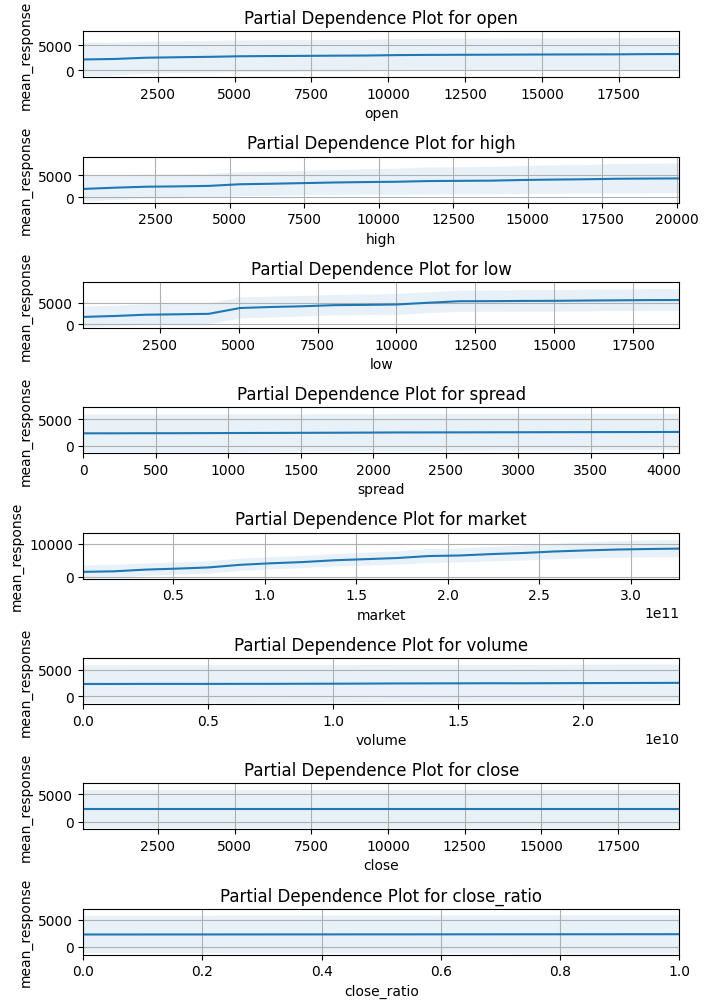

In [64]:
pdp = ensembleStack_model.partial_plot(data=cryptoTrain, cols=['open', 'high', 'low', 'spread', 'market', 'volume', 'close', 'close_ratio'])


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

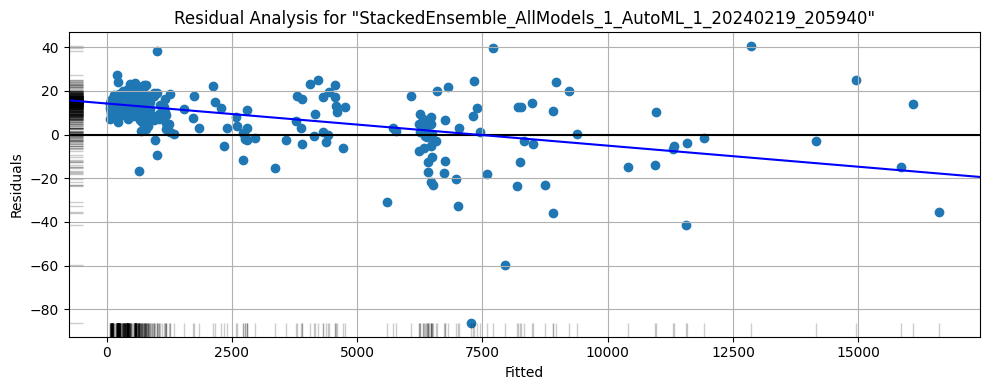

In [104]:
explain_model = ensembleStack_model.explain(frame = cryptoTest, figsize = (10,4), include_explanations=['varimp', "residual_analysis", "shap_summary"])


With these results we can say that the relationship determine with the Stacked Ensemble method is Significant.
<br/>
<br/>
##Are any model assumptions violated?

- Base Model Independence
    * Stacked ensemble assumes that the base models that are being used are never dependent on each other. Which is that the models don't interefere with each others predictions.
- Homogeneity of Predictions
    * Stacked Ensembles assume that combining predictions from multiple base models leads to better performance than any individual base model alone. This assumption holds if the predictions from different base models are complementary and collectively capture different aspects of the underlying data distribution
- Cross-Validation Assumptions
    * When training Stacked Ensembles, cross-validation is often used to estimate performance and select models for the ensemble. This assumes that the cross-validation procedure effectively estimates the model's performance on unseen data

Sunce our model does not violate these assumptions it can be said that no assumptions are violated.
<br/>
<br/>

## Is there any multicollinearity in the model?

To check for multicolinearity we can refer to the predictions that we can create from out model on the training data.

In [84]:
base_model_predictions = ensembleStack_model.predict(cryptoTrain)
base_model_predictions.head()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict
117.459
124.398
105.259
93.0857
83.9214
98.5365
101.411
98.7092
98.2486
97.8518


In [92]:
base_models = ensembleStack_model.base_models
variable_importances = {}

for model_id in base_models:
    base_model = h2o.get_model(model_id)
    variable_importances[model_id] = base_model.varimp()

variable_importances


{'GBM_5_AutoML_1_20240219_205940': [('market',
   53448695808.0,
   1.0,
   0.5257086089612573),
  ('low', 39600414720.0, 0.7409051637528031, 0.3895002230086987),
  ('high', 7402255360.0, 0.1384927218166483, 0.07280681613748854),
  ('open', 1189134208.0, 0.022248142635166317, 0.011696040116704927),
  ('volume', 14852035.0, 0.0002778746005955304, 0.00014608106974474126),
  ('close_ratio', 11300436.0, 0.00021142585107396752, 0.00011114839006654542),
  ('spread', 3160133.25, 5.9124609164495334e-05, 3.108231603924485e-05)],
 'GBM_4_AutoML_1_20240219_205940': [('market',
   49847468032.0,
   1.0,
   0.492805409519454),
  ('low', 34400772096.0, 0.6901207514475186, 0.34009523953496773),
  ('high', 11218386944.0, 0.2250542983807776, 0.1109079756776525),
  ('open', 5652646912.0, 0.11339887731852771, 0.055883580176003374),
  ('close_ratio', 14051814.0, 0.00028189624377670137, 0.00013891999385637314),
  ('volume', 12170454.0, 0.0002441539055140589, 0.00012032036539262988),
  ('spread', 4911331.0,

With this we can say that there is some colineratity present in the data.
<br/>
<br/>
## In the multivariate models are predictor variables independent of all the other predictor variables?
A partial dependency plot can help with determining the predictor varaibles here. As shown above in the partial dependence plot for the Stacked Ensemble model, all predictors ar enot indepnedent of each other. Some are dependent.


##In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

With reference to the `VIF` values and the `PDP` we can say that the most significant predictor variables are as follows:
1. `market`
2. `low`
3. `high`

##Does the model make sense?

We can check how the model performs on the test set of data and check the results to see whether it makes sense or not.




In [93]:
ensembleStack_model.model_performance(test_data = cryptoTest)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 245.22202768948702
RMSE: 15.65956665075656
MAE: 13.694991887243521
RMSLE: 0.05024820460289988
Mean Residual Deviance: 245.22202768948702
R^2: 0.9999748212665075
Null degrees of freedom: 420
Residual degrees of freedom: 409
Null deviance: 4134878613.8117023
Residual deviance: 103238.47365727404
AIC: 3537.1573039579653

As we can notice that the values are clearly lesser than the training values, w e can confidently say that the Stacked Ensemble model which contains a number of other models does make sense.

## Does regularization help?
We can again employe ridge regression to get the ${R^2}$ values to comapre and see if there is any help that we can get with regularization. Since stacked ensemble estimator is a compilation of all the models listed above, with GBM being the most prominenmt, It can be safely assugmed that regularization will help becasuse it was the case for GBM.

##Which independent variables are significant?

Witht eh `VIF` and the `PDP` we can conclude that these significant independent variables are
- `market`
- `low`
- `high`
- `open`


## Which hyperparameters are important?

We first need to get a list of all the parameters for Stacked ensemble

In [96]:
ensembleStack_model.actual_params

{'model_id': 'StackedEnsemble_AllModels_1_AutoML_1_20240219_205940',
 'training_frame': 'AutoML_1_20240219_205940_training_py_3_sid_94df',
 'response_column': 'close',
 'validation_frame': None,
 'blending_frame': None,
 'base_models': [{'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GBM_5_AutoML_1_20240219_205940',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GBM_4_AutoML_1_20240219_205940',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GBM_2_AutoML_1_20240219_205940',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GBM_3_AutoML_1_20240219_205940',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version

With thsi we can determine the most important hyper parameters which are
- `metaLearner Algorithm : GLM`
- `nfolds`
- `base models used` : this refers to the base ML models that the estimator uses to make predictions


# Model 3 - XGBoost Grid (ID : XGBoost_grid_1_AutoML_1_20240219_205940_model_4)
In grid search with XGBoost, you define a grid of hyperparameter values for XGBoost, and the algorithm exhaustively searches through this grid to find the combination of hyperparameters that yields the best performance according to a specified evaluation metric. The grid typically includes various values for parameters such as:
- Number of trees
- Maximum depth of trees
- Learning rate
- Minimum child weight

Grid search evaluates the performance of the XGBoost model with each combination of hyperparameters using techniques such as cross-validation. The combination that results in the best performance, as determined by a specified evaluation metric (e.g., accuracy, AUC, mean squared error), is selected as the optimal set of hyperparameters for the XGBoost model.

Lets take a look at how the model performs

In [99]:
XGB_model = h2o.get_model("XGBoost_grid_1_AutoML_1_20240219_205940_model_4")
XGB_model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20240219_205940_model_4


Model Summary: 
    number_of_trees
--  -----------------
    49

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 67.0249630949826
RMSE: 8.186877493585854
MAE: 4.557584877530294
RMSLE: 0.0066917024668975734
Mean Residual Deviance: 67.0249630949826

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 13471.789560351039
RMSE: 116.06803849618136
MAE: 38.66383623167744
RMSLE: 0.022923413230960928
Mean Residual Deviance: 13471.789560351039

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     38.6622    2.84632      41.2976       40.8387       38.9475       38.0697       34.1576
mean_residual_deviance  13471.8    3680.94      13506         16419.2       16652.7       13254.3       7526.73
mse                     13471.8    3680.94      13506         16419.2       16652.7       13254.3       7526.73
r2                      0.998912   0.000286545  0.9989        0.998682      0.998676      0.99892       0.999381
residual_deviance       13471.8    3680.94      13506         16419.2       16652.7       13254.3       7526.73
rmse                    115.056    17.0955      116.215       128.137       129.045       115.127       86.7568
rmsle                   0.0227804  0.00282875   0.0273322     0.0234325     0.0217578     0.021423      0.0199564

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-02-19 21:01:11  22.019 sec  0                  4215.46          2329.07         1.77701e+07
    2024-02-19 21:01:11  22.146 sec  5                  713.577          390.99          509193
    2024-02-19 21:01:11  22.199 sec  10                 127.071          66.4774         16147
    2024-02-19 21:01:11  22.344 sec  15                 38.4754          15.3435         1480.36
    2024-02-19 21:01:11  22.425 sec  20                 24.0666          9.29516         579.201
    2024-02-19 21:01:11  22.506 sec  25                 18.2499          7.61478         333.058
    2024-02-19 21:01:12  22.604 sec  30                 15.6846          6.86653         246.007
    2024-02-19 21:01:12  22.661 sec  35                 13.2245          5.98894         174.886
    2024-02-19 21:01:12  22.709 sec  40                 11.1384          5.49417         124.064
    2024-02-19 21:01:12  22.759 sec  45                 9.33705          4.8996          87.1805
    2024-02-19 21:01:12  22.794 sec  49                 8.18688          4.55758         67.025

Variable Importances: 
variable     relative_importance    scaled_importance    percentage
-----------  ---------------------  -------------------  ------------
high         1.28767e+10            1                    0.510295
low          5.48549e+09            0.426001             0.217386
market       4.12031e+09            0.319982             0.163285
volume       1.43498e+09            0.11144              0.0568673
open         1.28704e+09            0.0999512            0.0510046
spread       1.71977e+07            0.00133557           0.000681533
close_ratio  1.21292e+07            0.000941952          0.000480673

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

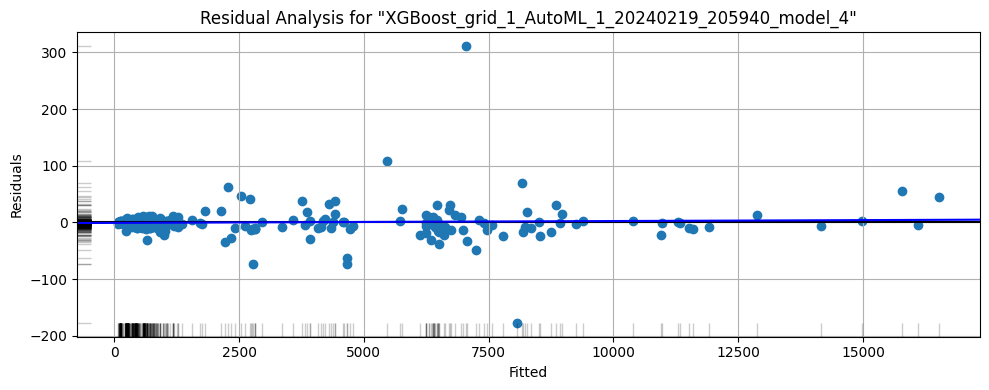

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

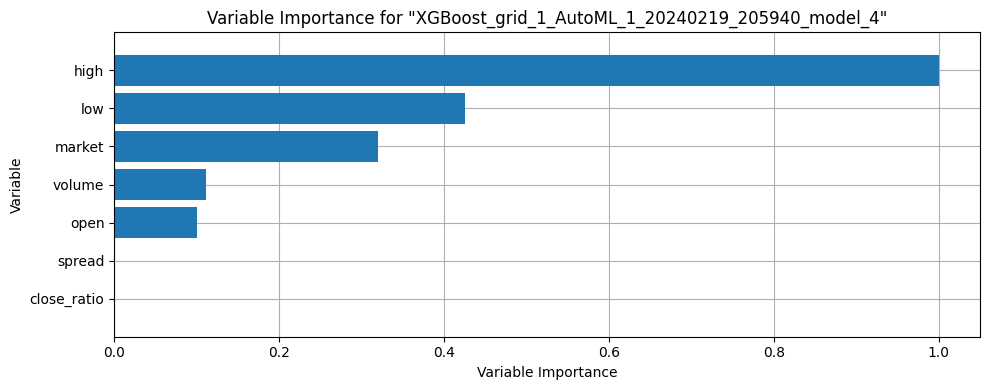

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

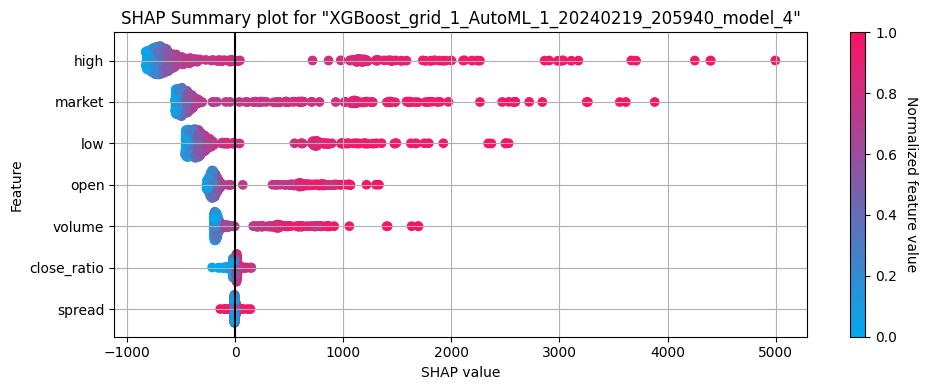

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

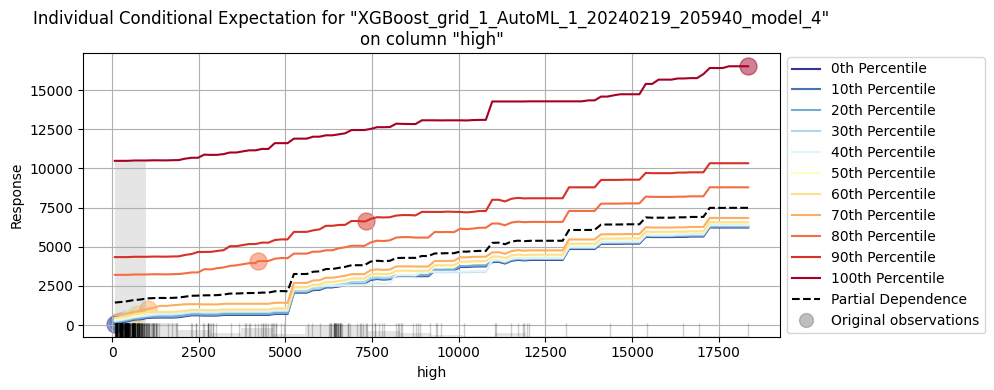

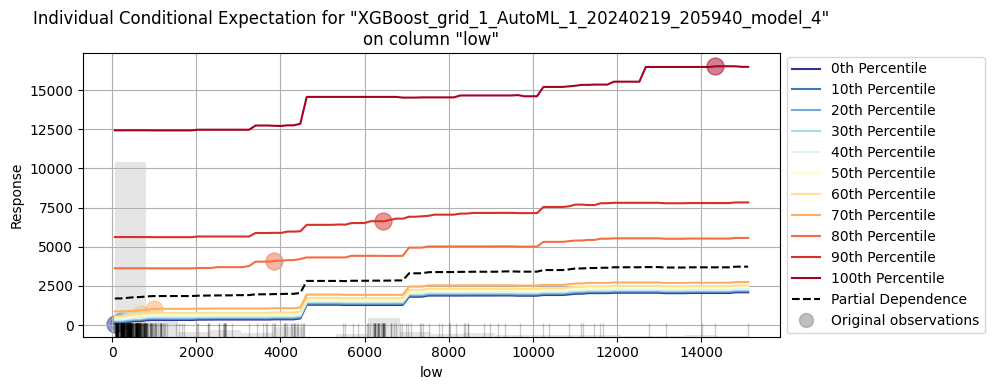

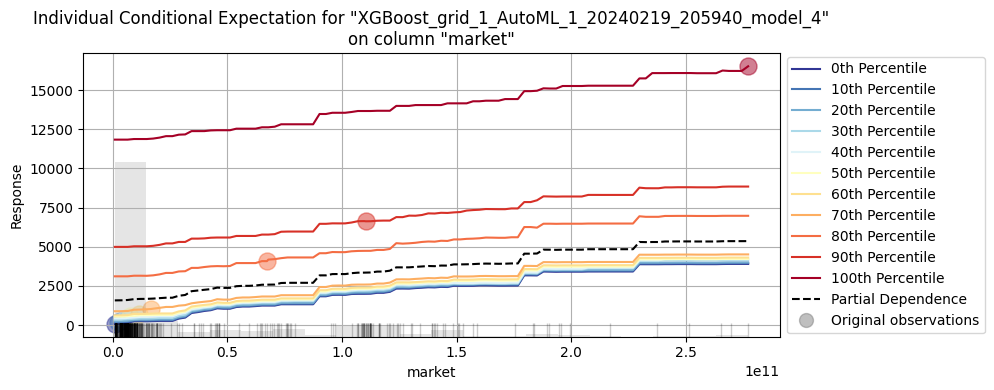

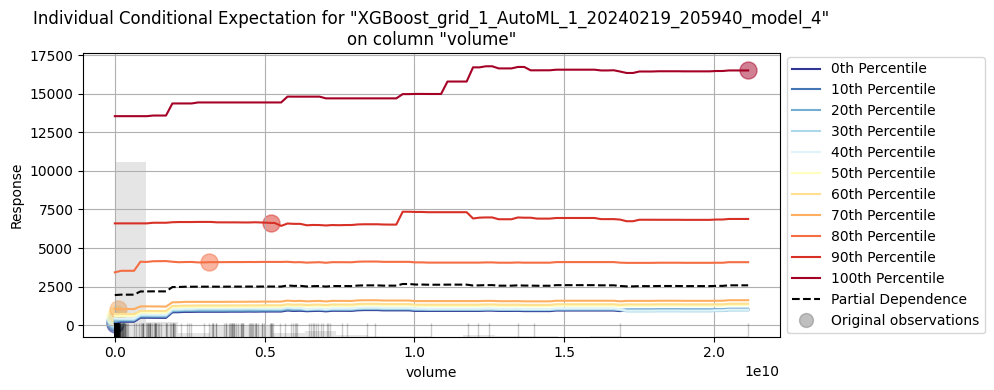

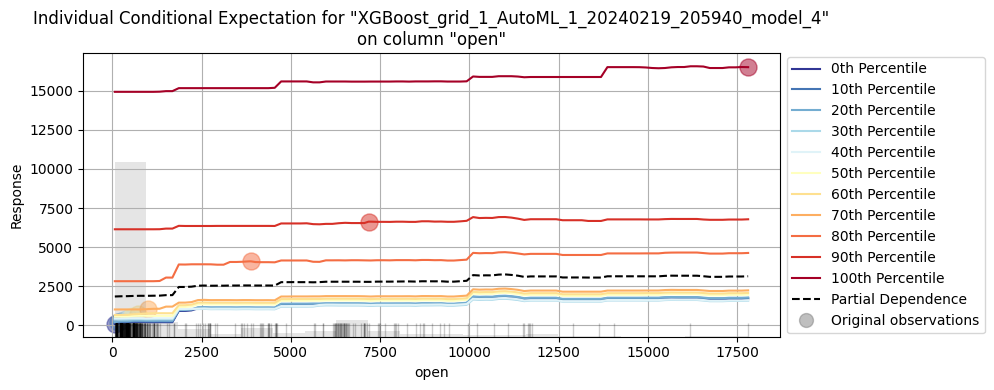

In [103]:
explain_model = XGB_model.explain(frame = cryptoTest, figsize = (10,4), include_explanations=['varimp', "residual_analysis", "varimp_heatmap", "shap_summary", "ice"])


##Is the relationship significant?

From the above variance importance graph we can see that XGBoost model poses a significant relationship between predictor and target variable(s)

##Are any model assumptions violated?

Mdoel assumptions for XGBoost are:

- Non Linearity
    * The data we have is for time series so it is bound to be non linear.

- Feature Importance
    * Since our dataset has features that have little to no effect on teh data, we can say that not all features are equally weighed when the model is applied.

- Balanced Classes
    * Since our data is regression based, the possibility of violating this assumption is near zero.

With these reasons we can say that the assumptions for XGBoost are not violated.


##Is there any multicollinearity in the model?

With the `ICE` graphs for all the features that are shown with the graphs, we can say that there is multicolinearity in our model.
<br/>
<br/>

## In the multivariate models are predictor variables independent of all the other predictor variables?





PartialDependencePlot progress: |

``data`` param of ``ModelBase.partial_plot`` is deprecated, please use ``frame`` instead.


████████████████████████████████████████████████| (done) 100%


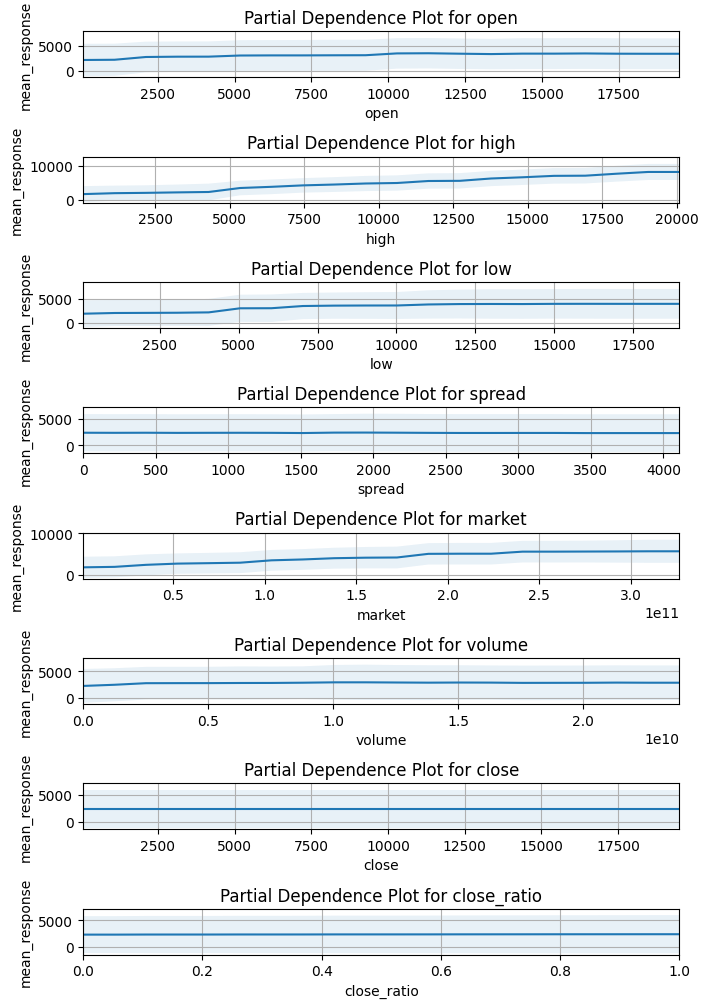

In [105]:
pdp = XGB_model.partial_plot(data=cryptoTrain, cols=['open', 'high', 'low', 'spread', 'market', 'volume', 'close', 'close_ratio'])

With the PD plot we can say some predictor varaibles are depndent and most of them are independent for XGBoost model.  

##In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

The ranks for significant predictors are as follows
1. `high`
2. `low`
3. `market`
4. `volume`
5. `open`


##Does the model make sense?

We can use the model on out testing data to see whether the model makes sense or not.



In [106]:
XGB_model.model_performance(cryptoTest)

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 485.8746933432404
RMSE: 22.04256548914487
MAE: 7.5205756071910725
RMSLE: 0.008930278436505595
Mean Residual Deviance: 485.8746933432404

Here we can see the difference in values for errors in the training and testing sets.

### Train
```
MSE   : 13471.789560351039
RMSE  : 116.06803849618136
MAE   : 38.66383623167744
RMSLE : 0.022923413230960928
MRD   : 13471.789560351039

```

###Test
```
MSE   : 485.8746933432404
RMSE  : 22.04256548914487
MAE   : 7.5205756071910725
RMSLE : 0.008930278436505595
MRD   : 485.8746933432404

```

We can see here that the errors are in range for our testing set and therefore we can say that the model does make sense.

We can also calculate the accuracy of the model based on these error metrics.

<br/>
<br/>

## Does regularization help?

For XGBoost we can see regularization with the follwing code



In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb



xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                          colsample_bytree = 0.3,
                          learning_rate = 0.1,
                          max_depth = 200,
                          alpha = 100,
                          n_estimators = 99)

xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


Mean Squared Error: 9201.9930036596


We have tested different params here for regularization and the least MSE that we have achieved is `9201.99` which is significantly lower than the MSE we observed on Training data. Hence we can sta that regularization helps in improving accuracy.

##Which independent variables are significant?

With the `Variable importance` and `PDP` and `ICE` plots we can say that teh significant variables are:

1. high
2. low
3. market

##Which hyperparameters are important?

To do this we can list the parameters for our XGBoost model.


In [119]:
XGB_model.actual_params

{'model_id': 'XGBoost_grid_1_AutoML_1_20240219_205940_model_4',
 'training_frame': 'AutoML_1_20240219_205940_training_py_3_sid_94df',
 'validation_frame': None,
 'nfolds': 5,
 'keep_cross_validation_models': False,
 'keep_cross_validation_predictions': True,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'fold_assignment': 'Modulo',
 'fold_column': None,
 'response_column': 'close',
 'ignored_columns': ['ranknow', 'symbol', 'date', 'slug', 'name'],
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'stopping_rounds': 0,
 'stopping_metric': 'deviance',
 'stopping_tolerance': 0.02479931753217214,
 'max_runtime_secs': 0.0,
 'seed': 1237,
 'distribution': 'gaussian',
 'tweedie_power': 1.5,
 'categorical_encoding': 'OneHotInternal',
 'quiet_mode': True,
 'checkpoint': None,
 'export_checkpoints_dir': None,
 'ntrees': 49,
 'max_depth': 9,
 'min_rows': 3.0,
 'min_child_weight': 3.0,
 'learn_rate': 0.3,
 'eta': 0.3,
 'sample_rate': 

In this we can see that the important hyper parameters are:
- learning_rate(eta)
- gamma
- max_depth
- ntrees

# Conclusion

From this AutoML notebook, we can observe how H2O library function and how it uses differnet parameters to fine tune and arrive at a model that suits the prediction for our dataset target variable. With H2O tehre were several models that we have looked at namely
- Gradient Boost Machine
   * A tree based laerning where decisions are broken down into subtrees and based on the input paramters given, the tree made can be used to arrive at a rpediction value that is accurate for our dataset.
- Stacked Ensemble
   * This method is a mix of all the models that AutoML uses to predict data. We take all the models and stack(combine) them in such a way that specific decisions are made by specific models whihc perform better in those scenarios. Ex: it could be that GBM performs better than XGB in outliers and vice versa, so Stacked Ensemble combines them in such a way so that the MSE for the resulting model is minimized
- XGBoost Grid
    * This model is similar to GBM but isntead of using trees to fine tune hyper paramters we use a grid based serach to find the optimal premutation of hyper parameters that result in the perfect outcome and minimizes the MSE.

These are some of the broader learnings covered in this notebook, along with some other important methods like `Regularization`, `Shrinkage`, `PDP`, `Variable importance` and may others to help in identifying the results and heling in identifying data driven insigths.

##Licences


1. [H2o.AI](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html)
2. [Pandas 1.4](https://pandas.pydata.org/docs/getting_started/overview.html)
3. [Kaggle Dataset](https://www.kaggle.com/datasets/jessevent/all-crypto-currencies/)
4. [SkLearn Estimators](https://scikit-learn.org/stable/developers/develop.html)


MIT License

Copyright (c) 2023 Sampurna

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


##References
1. [Karl Dornsainvl ](https://medium.com/@kdorsain/dealing-with-multicollinearity-of-features-2b13bc42fbe1)
2. [AI Skunks]( https://github.com/aiskunks/YouTube/tree/main/A_Crash_Course_in_Statistical_Learning/AutoML)
3. [ChatGPT](https://chat.openai.com/)
4. [Mehul Gupta](https://medium.com/data-science-in-your-pocket/understanding-partial-dependence-plots-pdps-415346b7e7f1)
5. [Model Explainaibility](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html#:~:text=The%20h2o.,utility%20functions%20outside%20the%20h2o.)
